In [49]:
# import libraries
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [50]:
def show_images(images, titles=None):
    plt.figure(figsize=(12, 6))
    for i, image in enumerate(images):
        plt.subplot(1, len(images), i+1)
        plt.imshow(image)
        if titles:
            plt.title(titles[i])
        plt.axis('off')
    plt.show()

In [51]:
def cutmix(image1, image2, alpha=0.2):
    height, width, _ = image1.shape

    # generate random bounding box
    cut_rat = np.random.rand()
    cut_w = int(width * cut_rat)
    cut_h = int(height * cut_rat)

    # Generate random center
    cut_x = np.random.randint(width)
    cut_y = np.random.randint(height)

    # Bounding box coordinates
    x1 = np.clip(cut_x - cut_w // 2, 0, width)
    y1 = np.clip(cut_y - cut_h // 2, 0, height)
    x2 = np.clip(cut_x + cut_w // 2, 0, width)
    y2 = np.clip(cut_y + cut_h // 2, 0, height)

    mixed_image = image1.copy()
    mixed_image[y1:y2, x1:x2, :] = image2[y1:y2, x1:x2, :]

    return mixed_image

In [52]:
def save_cutmix_images(image1, image2, num_images, output_dir='cutmix_images'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for i in range(num_images):
        aug_image = cutmix(image1, image2)

        cv2.imwrite(os.path.join(output_dir, f'cutmix_{i}.jpg'), cv2.cvtColor(aug_image, cv2.COLOR_BGR2RGB))

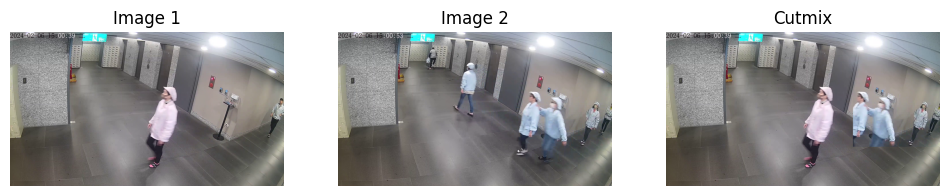

In [53]:
# load and show
image1 = cv2.imread('image1.png')
image2 = cv2.imread('image2.png')
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

cutmix_image = cutmix(image1, image2)

show_images([image1, image2, cutmix_image], titles=['Image 1', 'Image 2', 'Cutmix'])

save_cutmix_images(image1, image2, num_images=2)